# マルコフ連鎖

`Pkg.clone` で `master` ブランチのバージョンをインストールしてください．(2015/7/22)

```julia
julia> Pkg.clone("QuantEcon")
```

In [1]:
using QuantEcon
using PyPlot

INFO: Loading help data...


## 例1

簡単な例として次の遷移確率行列で与えられるマルコフ連鎖を考えましょう：

In [2]:
P = [0.4 0.6
     0.2 0.8]

2x2 Array{Float64,2}:
 0.4  0.6
 0.2  0.8

`MarkovChain` タイプのインスタンスを作ります：

In [3]:
mc = MarkovChain(P)

Discrete Markov Chain
stochastic matrix:
2x2 Array{Float64,2}:
 0.4  0.6
 0.2  0.8


標本経路を発生させてみましょう (第2引数は初期状態の分布)：

In [4]:
s = mc_sample_path(mc, [0.5; 0.5], 100000)

100000-element Array{Int64,1}:
 1
 2
 2
 1
 2
 2
 2
 2
 2
 1
 2
 2
 2
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 1

状態 `1`, `2` を訪れる頻度は：

In [5]:
mean(s .== 1), mean(s .== 2)

(0.24909,0.75091)

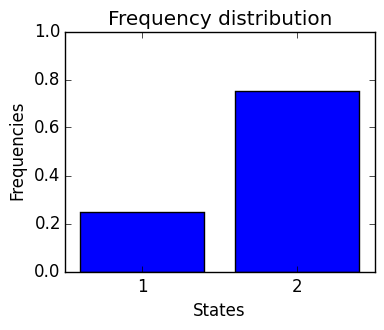

(PyObject <matplotlib.patches.Rectangle object at 0x11d842450>,PyObject <matplotlib.patches.Rectangle object at 0x11d842850>)

In [6]:
fig, ax = subplots(figsize=(4,3))
bins = [1:2]
frequencies = [mean(s .== i) for i in bins]
ax[:set_title]("Frequency distribution")
ax[:set_xlabel]("States")
ax[:set_ylabel]("Frequencies")
ax[:set_xlim](bins[1]-0.5, bins[end]+0.5)
ax[:set_ylim](0, 1)
ax[:set_xticks](bins)
bar(bins, frequencies, align="center")

定常分布を求めると：

In [7]:
x = mc_compute_stationary(mc)

2-element Array{Float64,1}:
 0.25
 0.75

このマルコフ連鎖は既約 (irreducible) なので定常分布は一意．

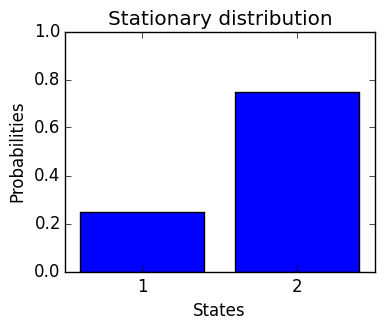

(PyObject <matplotlib.patches.Rectangle object at 0x11d98dd90>,PyObject <matplotlib.patches.Rectangle object at 0x11d98dfd0>)

In [8]:
fig, ax = subplots(figsize=(4,3))
bins = [1:2]
ax[:set_title]("Stationary distribution")
ax[:set_xlabel]("States")
ax[:set_ylabel]("Probabilities")
ax[:set_xlim](bins[1]-0.5, bins[end]+0.5)
ax[:set_ylim](0, 1)
ax[:set_xticks](bins)
bar(bins, x, align="center")

## 例2

可約 (reducible) なマルコフ連鎖：

In [9]:
mc2 = MarkovChain([1 0; 0 1])

Discrete Markov Chain
stochastic matrix:
2x2 Array{Int64,2}:
 1  0
 0  1


各 recurrent class に対して1つの定常分布を返します：

In [10]:
mc_compute_stationary(mc2)

2x2 Array{Int64,2}:
 1  0
 0  1

もう少し大きな例：

In [11]:
P = zeros(Float64, (6, 6))
P[1, 1] = 1
P[2, 5] = 1
P[3, [3, 4, 5]] = 1/3
P[4, [1, 6]] = 1/2
P[5, [2, 5]] = 1/2
P[6, [1, 4]] = 1/2

0.5

In [12]:
mc3 = MarkovChain(P)

Discrete Markov Chain
stochastic matrix:
6x6 Array{Float64,2}:
 1.0  0.0  0.0       0.0       0.0       0.0
 0.0  0.0  0.0       0.0       1.0       0.0
 0.0  0.0  0.333333  0.333333  0.333333  0.0
 0.5  0.0  0.0       0.0       0.0       0.5
 0.0  0.5  0.0       0.0       0.5       0.0
 0.5  0.0  0.0       0.5       0.0       0.0


Communication class たち：

In [13]:
communication_classes(mc3)

4-element Array{Array{Int64,1},1}:
 [1]  
 [2,5]
 [4,6]
 [3]  

Recurrent class たち：

In [14]:
recurrent_classes(mc3)

2-element Array{Array{Int64,1},1}:
 [1]  
 [2,5]

定常分布たち：

In [15]:
stationary_dists = mc_compute_stationary(mc3)

6x2 Array{Float64,2}:
 1.0  0.0     
 0.0  0.333333
 0.0  0.0     
 0.0  0.0     
 0.0  0.666667
 0.0  0.0     

In [16]:
transpose(stationary_dists) * mc3.p

2x6 Array{Float64,2}:
 1.0  0.0       0.0  0.0  0.0       0.0
 0.0  0.333333  0.0  0.0  0.666667  0.0

## 例3

可約に近い既約なマルコフ連鎖：

In [17]:
p = 0.5
e = 1e-10

P = [1-(p+e) p       e
     p       1-(p+e) e
     e       e       1-2*e]

3x3 Array{Float64,2}:
 0.5      0.5      1.0e-10
 0.5      0.5      1.0e-10
 1.0e-10  1.0e-10  1.0    

定常分布の理論値は $\varepsilon$ によらず ($\varepsilon > 0$ である限り) $(1/3, 1/3, 1/3)$．

In [18]:
mc_compute_stationary(MarkovChain(P))

3-element Array{Float64,1}:
 0.333333
 0.333333
 0.333333

In [19]:
e = 1e-100

P = [1-(p+e) p       e
     p       1-(p+e) e
     e       e       1-2*e]

3x3 Array{Float64,2}:
 0.5       0.5       1.0e-100
 0.5       0.5       1.0e-100
 1.0e-100  1.0e-100  1.0     

In [20]:
mc_compute_stationary(MarkovChain(P))

3-element Array{Float64,1}:
 0.333333
 0.333333
 0.333333

## 解説

http://quant-econ.net/jl/finite_markov.html を参照のこと．